In [1]:
#importing packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
sns.set(color_codes = True)

## Ex-Gaussian Plots

In [3]:
#reading in fitted values csv
fit_df = pd.read_csv("Task_Zscore_Final.csv", index_col = 0)
fit_df.head()

,subject,Mem_Update,OSPAN,RAPM,Tau,Mu,Sigma,SCamp,Task
0,1,-0.081524,-0.322953,1.342009,106.724458,152.070800,45.234478,4.607705,Aesthetic
1,2,0.955907,0.918399,-0.620930,120.855988,154.362654,42.322657,4.350217,Aesthetic
2,3,1.130691,0.363323,0.949421,111.727054,150.132526,40.677544,4.196172,Aesthetic
3,4,0.465382,1.120244,-0.228342,172.398595,213.271239,78.252791,4.622512,Aesthetic
4,5,0.899524,1.009229,1.734597,123.166384,153.375971,57.314410,5.075996,Aesthetic


In [4]:
#index of highest tau value
max_tau = fit_df["Tau"].idxmax()
print(max_tau)
#subject number
tau_sbj = fit_df.loc[170, "subject"]
print(tau_sbj)
#tau value
t = fit_df.loc[170, "Tau"]
print(t)
#task
tau_task = fit_df.loc[170, "Task"]
print(tau_task)
#mu value
m = fit_df.loc[170, "Mu"]
print(m)
#sigma value
s = fit_df.loc[170, "Sigma"]
print(s)

170
73
228.14466335
Memorize
168.00983630000005
56.47016447


In [3]:
#reading in Memorization raw values
mem_df = pd.read_csv("SM01_Retest_Memorize_Task.csv", index_col = 0)
mem_df.head()

C:\Users\ehall\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
1972,1,target_arcade,memorize,41,676.0,451.0,121,9.06
1973,1,target_arcade,memorize,42,617.0,125.0,256,5.69
1971,1,target_arcade,memorize,40,659.0,739.0,142,7.71
1970,1,target_arcade,memorize,39,609.0,765.0,226,1.71
1968,1,target_arcade,memorize,37,342.0,539.0,216,3.23


In [4]:
mem_sub = mem_df.durs.loc[mem_df["subj"] == 73]
mem_sub.count()

1048

In [24]:
sns.set_style("white")
sns.set_style("ticks")

In [49]:
print(sns.__version__)

0.10.0


In [50]:
!pip install seaborn --upgrade

     |████████████████████████████████| 285 kB 3.5 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


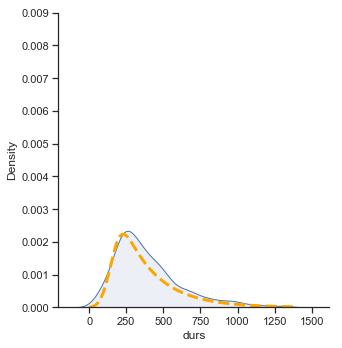

In [45]:
import scipy as scipy
ax = sns.displot(mem_sub, fill = True,  kind="kde", alpha=0.1)

samples = 1048
mu = 168
sigma = 56
tau = 228
  
# Creating vectors X and Y
x = np.linspace(0, 1400, samples)
y = (1 / tau * np.exp((mu/tau) + (sigma**2) / (2 * tau**2) - (x / tau))) * (np.cumsum(scipy.stats.norm.pdf(x,168,56)))

# Create the plot
ax.set(ylim=(0, 0.009))
plt.plot(x, y,  'r--',linewidth=3, color='orange')
sns.despine()

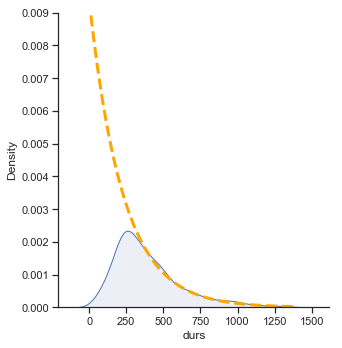

In [44]:
ax = sns.displot(mem_sub, fill = True,  kind="kde", alpha=0.1)
# Initial value of y at t=0, lifetime in s
N, tau = 0.0094, 228
# Maximum time to consider (s)
tmax = 1400
# A suitable grid of time points, and the exponential decay itself
t = np.linspace(0, tmax, 1500)
y = N * np.exp(-t/tau)

plt.plot(t, y,  'r--',linewidth=3, color='orange')
ax.set(ylim=(0, 0.009))
sns.despine()

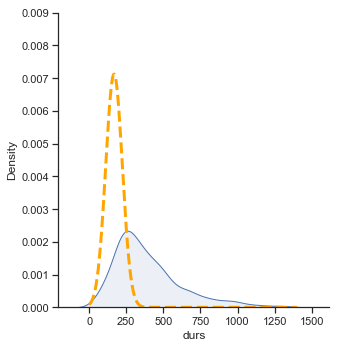

In [53]:
ax = sns.displot(mem_sub, fill = True,  kind="kde", alpha=0.1)

x = np.linspace(0, 1400, samples)
y = scipy.stats.norm.pdf(x,168,56)
ax.set(ylim=(0, 0.009))
plt.plot(x, y,  'r--',linewidth=3, color='orange')
sns.despine()

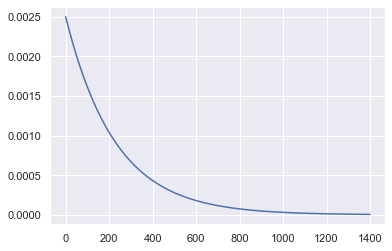

In [19]:
# Initial value of y at t=0, lifetime in s
N, tau = 0.0025, 228
# Maximum time to consider (s)
tmax = 1400
# A suitable grid of time points, and the exponential decay itself
t = np.linspace(0, tmax, 1500)
y = N * np.exp(-t/tau)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, y)

## Creating Histogram for One Subject's Fixation Distribution

In [3]:
#reading in cleaned dataset for Aesthetic Task
aes_df = pd.read_csv("SM01_Retest_Aesthetic_Task.csv", index_col = 0)
aes_df

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
2599,1,target_closet,aesthetic,13,387.0,113.0,175,2.17
2646,1,target_coffeeshop,aesthetic,18,381.0,647.0,291,1.39
2540,1,target_cemetery,aesthetic,31,304.0,462.0,165,6.58
2489,1,target_busstop,aesthetic,19,146.0,312.0,122,9.07
2853,1,target_desktop,aesthetic,31,415.0,839.0,464,2.80
...,...,...,...,...,...,...,...,...
340082,100,target_train,aesthetic,34,439.0,868.0,333,1.10
340081,100,target_train,aesthetic,33,509.0,822.0,292,2.07
340080,100,target_train,aesthetic,32,453.0,855.0,305,1.61
340090,100,target_tunnel,aesthetic,6,232.0,807.0,218,5.07


In [4]:
aes_sub = aes_df.durs.loc[aes_df["subj"] == 1]
aes_sub

2599    175
2646    291
2540    165
2489    122
2853    464
       ... 
3358    220
3359    567
3360    139
3187    170
3216    193
Name: durs, Length: 414, dtype: int64

Text(155, 0.005168249208728968, 'mu')

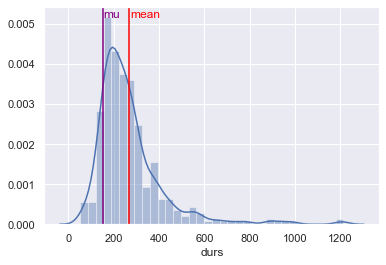

In [14]:
# raw and fitted, smaller bin size
aes_plot = sns.distplot(aes_sub)
plt.axvline(aes_sub.mean(), color = "red", label = "mean")
plt.text(x = aes_sub.mean() + 3, y = max([h.get_height() for h in aes_plot.patches]), s = "mean", color = "red")
plt.axvline(152, color = "purple", label = "mu")
plt.text(x = 152 + 3, y = max([h.get_height() for h in aes_plot.patches]), s = "mu", color = "purple")

In [3]:
import scipy.stats

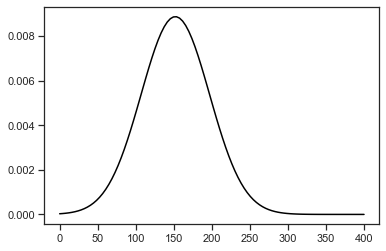

In [51]:
x = np.linspace(0, 400, 100)
y = scipy.stats.norm.pdf(x,152,45)
plt.plot(x,y, color = "black")

In [ ]:
# put lines for raw mean, Mu, Tau

## Creating Histogram for Ex-Gauss Values Across Participants

### Aesthetic Task

In [13]:
#reading in qmpe values for aesthetic 
aes_qmpe_df = pd.read_csv("Aes_Zscore_Final.csv", index_col =0)
aes_qmpe_df

,subject,Mem_Update,OSPAN,RAPM,Tau,Mu,Sigma,SCamp
0,1,-0.081524,-0.322953,1.342009,106.724458,152.070800,45.234478,4.607705
1,2,0.955907,0.918399,-0.620930,120.855988,154.362654,42.322657,4.350217
2,3,1.130691,0.363323,0.949421,111.727054,150.132526,40.677544,4.196172
3,4,0.465382,1.120244,-0.228342,172.398595,213.271239,78.252791,4.622512
4,5,0.899524,1.009229,1.734597,123.166384,153.375971,57.314410,5.075996
5,6,0.420277,1.009229,-1.406105,99.036833,142.774136,34.428104,4.744921
6,7,-1.372674,1.009229,-1.013517,175.320817,150.662466,37.365567,3.687005
7,8,-0.763747,0.867937,0.949421,92.242802,192.837692,57.111976,4.215256
8,9,2.117378,1.291813,0.949421,103.864945,190.251821,55.178194,5.270961
9,10,0.048155,-1.049598,0.556834,118.786518,139.051999,25.429333,2.570770


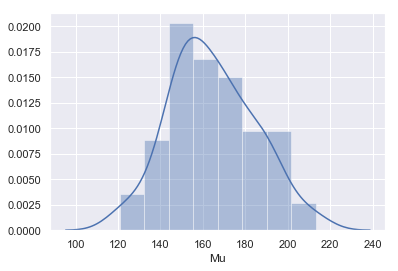

In [15]:
#variability in the mu parameter for aesthetic task
aes_mu = aes_qmpe_df.Mu
sns.distplot(aes_mu)

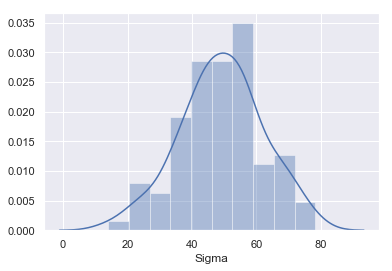

In [17]:
#variability in the sigma parameter for aesthetic task
aes_sig = aes_qmpe_df.Sigma
sns.distplot(aes_sig)

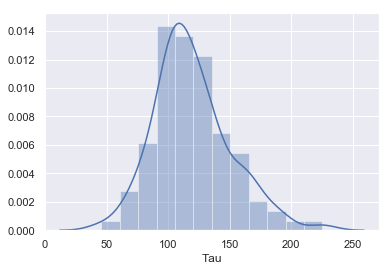

In [18]:
#variability in the tau parameter for aesthetic task
aes_tau = aes_qmpe_df.Tau
sns.distplot(aes_tau)

### Memorize Task

In [19]:
#reading in qmpe values for memorize
mem_qmpe_df = pd.read_csv("Mem_Zscore_Final.csv", index_col = 0)
mem_qmpe_df

,subject,Mem_Update,OSPAN,RAPM,Tau,Mu,Sigma,SCamp
0,1,-0.081524,-0.322953,1.342009,102.721089,139.883892,37.807063,4.679519
1,2,0.955907,0.918399,-0.620930,97.656617,163.986945,57.422247,4.817836
2,3,1.130691,0.363323,0.949421,102.457896,124.041671,41.459446,3.981049
3,4,0.465382,1.120244,-0.228342,150.668076,208.590699,98.266527,4.165634
4,5,0.899524,1.009229,1.734597,112.829027,149.215281,64.349666,4.686260
5,6,0.420277,1.009229,-1.406105,111.234232,138.600175,32.874102,4.123028
6,7,-1.372674,1.009229,-1.013517,165.884528,132.957235,28.387115,3.670511
7,8,-0.763747,0.867937,0.949421,96.223102,183.588432,54.434098,3.653761
8,9,2.117378,1.291813,0.949421,115.347758,188.511885,59.701668,4.789211
9,10,0.048155,-1.049598,0.556834,119.374268,129.667358,26.885107,2.826130


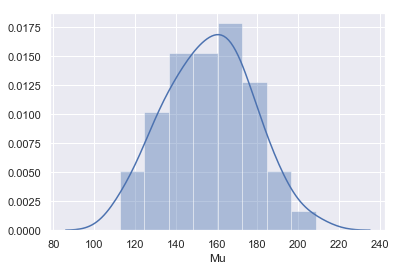

In [20]:
#variability in the mu parameter for memorize task
mem_mu = mem_qmpe_df.Mu
sns.distplot(mem_mu)

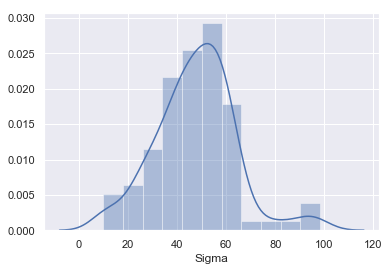

In [21]:
#variability in the sigma parameter for memorize task
mem_sig = mem_qmpe_df.Sigma
sns.distplot(mem_sig)

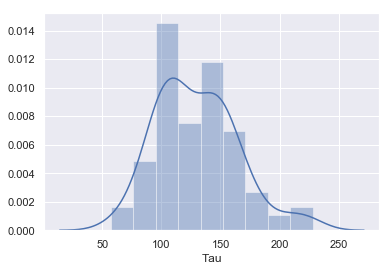

In [22]:
#variability in the tau parameter for memorize task
mem_tau = mem_qmpe_df.Tau
sns.distplot(mem_tau)

## Scatterplots

### Aesthetic Task

In [53]:
aes_long_df = pd.read_csv("Aes_Long_Final.csv", index_col = 0)
aes_long_df.head()

,subject,Test,Score,Mu,Sigma,Tau,SCamp
0,1,Mem_Update,-0.081524,152.070800,45.234478,106.724458,4.607705
1,2,Mem_Update,0.955907,154.362654,42.322657,120.855988,4.350217
2,3,Mem_Update,1.130691,150.132526,40.677544,111.727054,4.196172
3,4,Mem_Update,0.465382,213.271239,78.252791,172.398595,4.622512
4,5,Mem_Update,0.899524,153.375971,57.314410,123.166384,5.075996


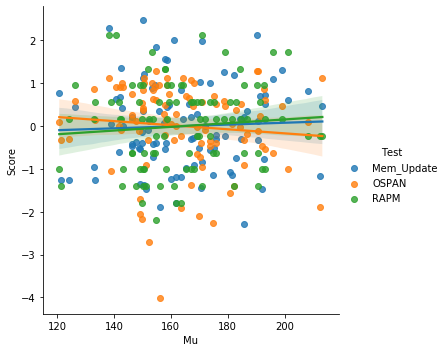

In [5]:
sns.lmplot(x="Mu", y="Score", hue="Test", data= aes_long_df)

In [54]:
sns.set_style("white")
sns.set_style("ticks")

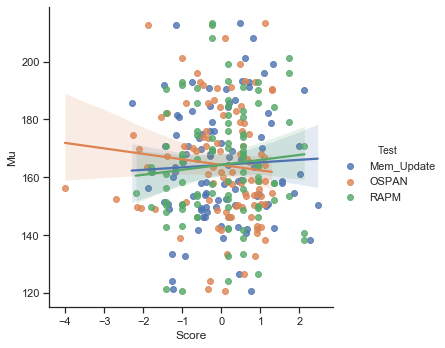

In [62]:
aes_mu = sns.lmplot(x="Score", y="Mu", hue="Test", data= aes_long_df)
sns.despine()
aes_mu = aes_mu.fig
aes_mu.savefig("Aes_Mu_Scatterplot_HD.png", dpi = 300)

In [69]:
sns.set_context(context = "notebook", font_scale = 1.3)
sns.set_palette(palette = "tab10")

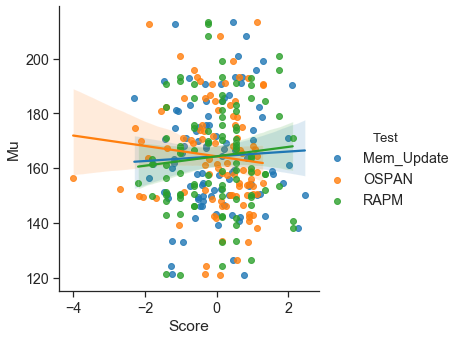

In [71]:
aes_mu = sns.lmplot(x="Score", y="Mu", hue="Test", data= aes_long_df)
sns.despine()
aes_mu = aes_mu.fig
aes_mu.savefig("Aes_Mu_Scatterplot_Poster.png", dpi = 300)

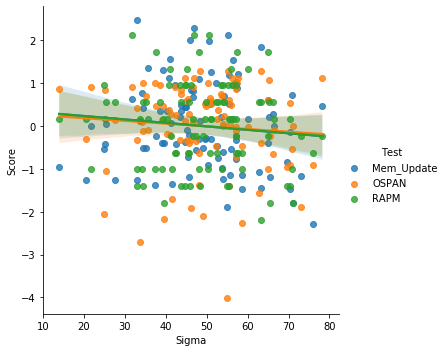

In [6]:
sns.lmplot(x="Sigma", y="Score", hue="Test", data= aes_long_df)

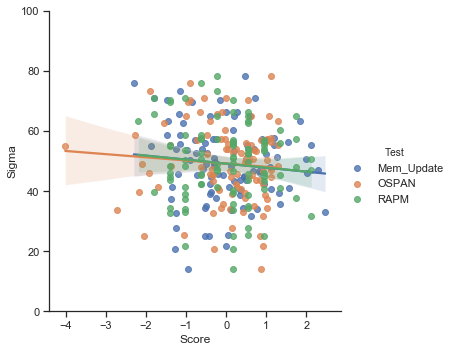

In [65]:
aes_sig = sns.lmplot(x="Score", y="Sigma", hue="Test", data= aes_long_df)
aes_sig.set(ylim = (0, 100))
sns.despine()
aes_sig = aes_sig.fig
aes_sig.savefig("Aes_Sigma_Scatterplot_HD.png", dpi =300)

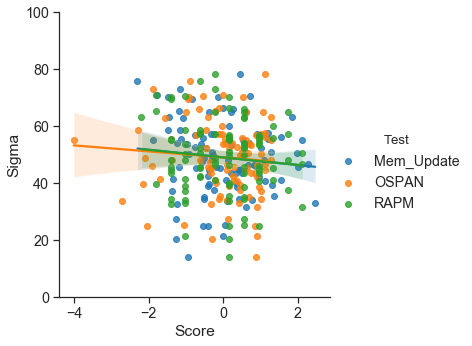

In [72]:
aes_sig = sns.lmplot(x="Score", y="Sigma", hue="Test", data= aes_long_df)
aes_sig.set(ylim = (0, 100))
sns.despine()
aes_sig = aes_sig.fig
aes_sig.savefig("Aes_Sigma_Scatterplot_Poster.png", dpi =300)

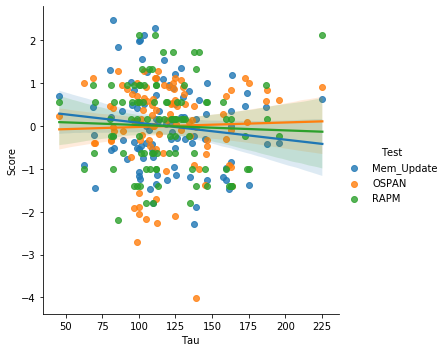

In [7]:
sns.lmplot(x="Tau", y="Score", hue="Test", data= aes_long_df)

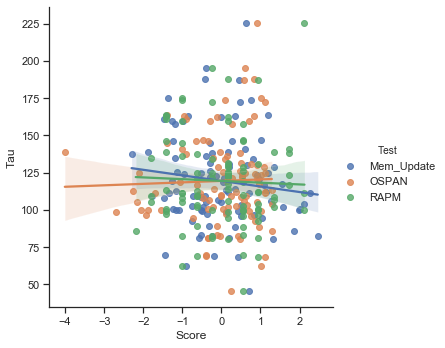

In [67]:
aes_tau = sns.lmplot(x="Score", y="Tau", hue="Test", data= aes_long_df)
sns.despine()
aes_tau = aes_tau.fig
aes_tau.savefig("Aes_Tau_Scatterplot_HD.png", dpi = 300)

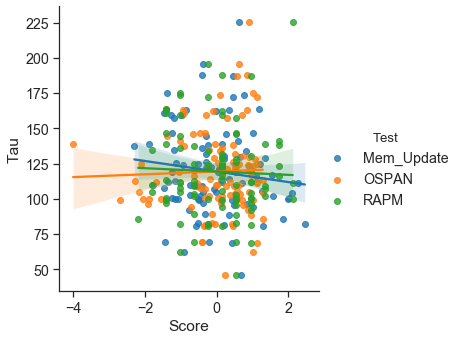

In [73]:
aes_tau = sns.lmplot(x="Score", y="Tau", hue="Test", data= aes_long_df)
sns.despine()
aes_tau = aes_tau.fig
aes_tau.savefig("Aes_Tau_Scatterplot_Poster.png", dpi = 300)

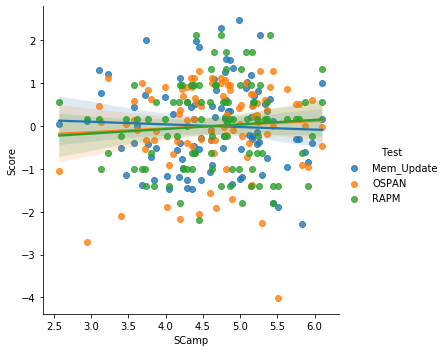

In [8]:
sns.lmplot(x="SCamp", y="Score", hue="Test", data= aes_long_df)

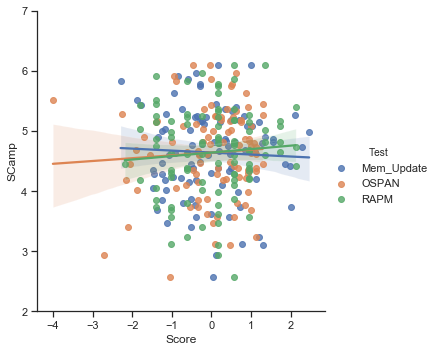

In [74]:
aes_scamp = sns.lmplot(x="Score", y="SCamp", hue="Test", data= aes_long_df)
aes_scamp.set(ylim = (2, 7))
sns.despine()
aes_scamp = aes_scamp.fig
aes_scamp.savefig("Aes_SCamp_Scatterplot_HD.png", dpi = 300)

### Memorize Task

In [74]:
mem_long_df = pd.read_csv("Mem_Long_Final.csv", index_col = 0)
mem_long_df.head()

,subject,Test,Score,Mu,Sigma,Tau,SCamp
0,1,Mem_Update,-0.081524,139.883892,37.807063,102.721089,4.679519
1,2,Mem_Update,0.955907,163.986945,57.422247,97.656617,4.817836
2,3,Mem_Update,1.130691,124.041671,41.459446,102.457896,3.981049
3,4,Mem_Update,0.465382,208.590699,98.266527,150.668076,4.165634
4,5,Mem_Update,0.899524,149.215281,64.349666,112.829027,4.686260


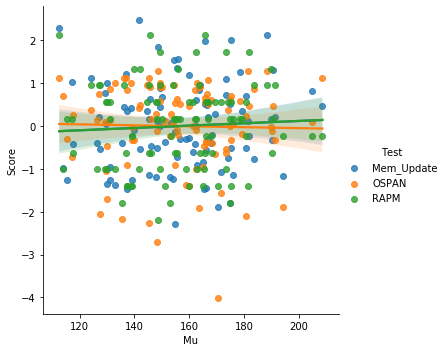

In [11]:
sns.lmplot(x="Mu", y="Score", hue="Test", data= mem_long_df)

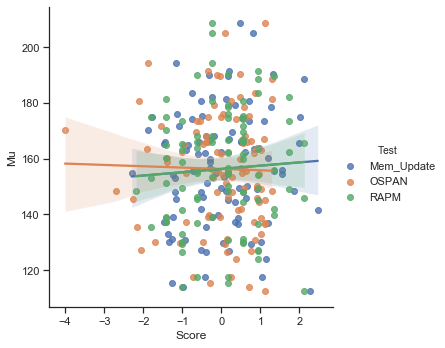

In [63]:
mem_mu = sns.lmplot(x="Score", y="Mu", hue="Test", data= mem_long_df)
sns.despine()
mem_mu = mem_mu.fig
mem_mu.savefig("Mem_Mu_Scatterplot_HD.png", dpi = 300)

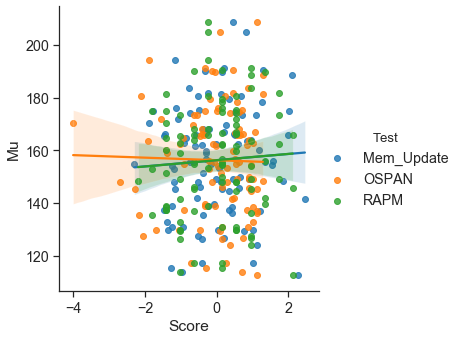

In [76]:
mem_mu = sns.lmplot(x="Score", y="Mu", hue="Test", data= mem_long_df)
sns.despine()
mem_mu = mem_mu.fig
mem_mu.savefig("Mem_Mu_Scatterplot_Poster.png", dpi = 300)

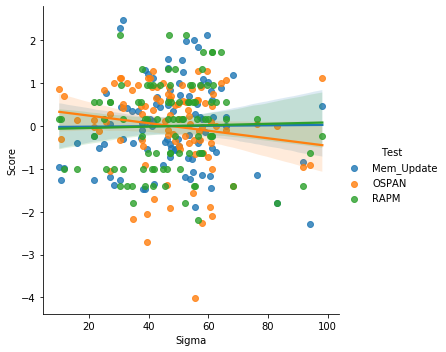

In [12]:
sns.lmplot(x="Sigma", y="Score", hue="Test", data= mem_long_df)

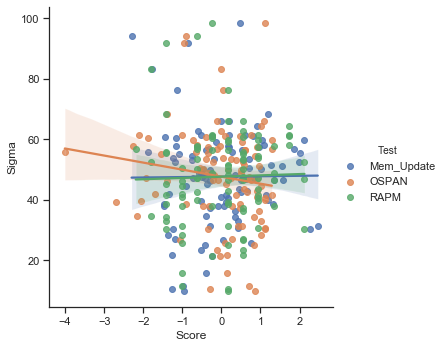

In [66]:
mem_sig = sns.lmplot(x="Score", y="Sigma", hue="Test", data= mem_long_df)
sns.despine()
mem_sig = mem_sig.fig
mem_sig.savefig("Mem_Sigma_Scatterplot_HD.png", dpi = 300)

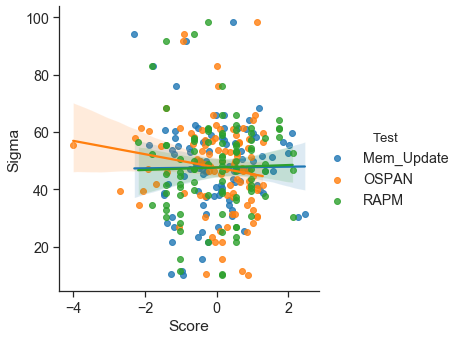

In [77]:
mem_sig = sns.lmplot(x="Score", y="Sigma", hue="Test", data= mem_long_df)
sns.despine()
mem_sig = mem_sig.fig
mem_sig.savefig("Mem_Sigma_Scatterplot_Poster.png", dpi = 300)

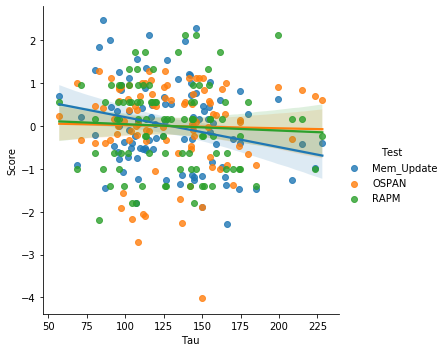

In [13]:
sns.lmplot(x="Tau", y="Score", hue="Test", data= mem_long_df)

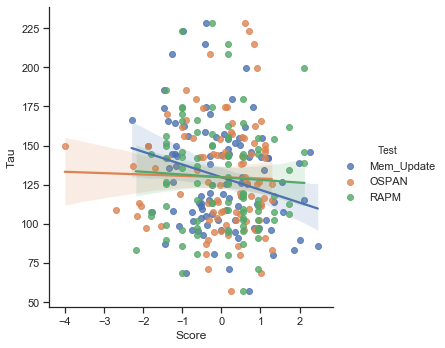

In [68]:
mem_tau = sns.lmplot(x="Score", y="Tau", hue="Test", data= mem_long_df)
sns.despine()
mem_tau = mem_tau.fig
mem_tau.savefig("Mem_Tau_Scatterplot_HD.png", dpi = 300)

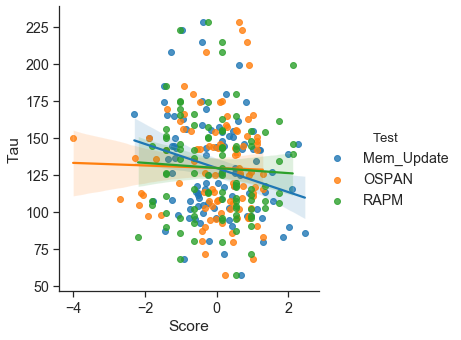

In [78]:
mem_tau = sns.lmplot(x="Score", y="Tau", hue="Test", data= mem_long_df)
sns.despine()
mem_tau = mem_tau.fig
mem_tau.savefig("Mem_Tau_Scatterplot_Poster.png", dpi = 300)

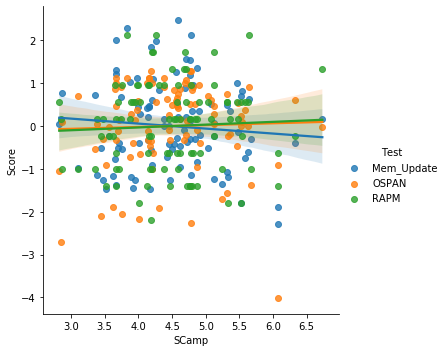

In [14]:
sns.lmplot(x="SCamp", y="Score", hue="Test", data= mem_long_df)

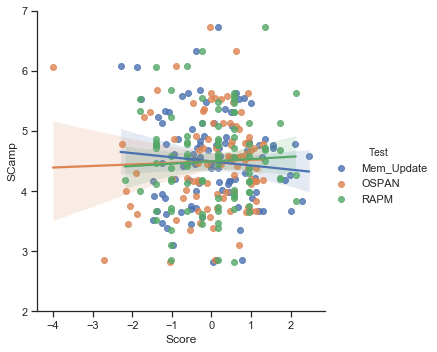

In [78]:
mem_scamp = sns.lmplot(x="Score", y="SCamp", hue="Test", data= mem_long_df)
mem_scamp.set(ylim = (2, 7))
mem_scamp = mem_scamp.fig
mem_scamp.savefig("Mem_SCamp_Scatterplot_HD.png", dpi = 300)

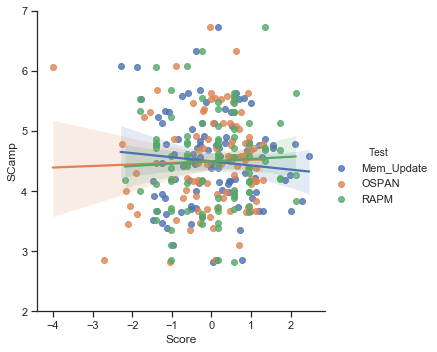

In [81]:
mem_scamp = sns.lmplot(x="Score", y="SCamp", hue="Test", ci = 95, data= mem_long_df)
mem_scamp.set(ylim = (2, 7))
#mem_scamp = mem_scamp.fig
#mem_scamp.savefig("Mem_SCamp_Scatterplot_HD.png", dpi = 300)

## Task Boxplots

In [3]:
both_task_df = pd.read_csv("Task_Zscore_Final.csv", index_col = 0)
both_task_df

,subject,Mem_Update,OSPAN,RAPM,Tau,Mu,Sigma,SCamp,Task
0,1,-0.081524,-0.322953,1.342009,106.724458,152.070800,45.234478,4.607705,Aesthetic
1,2,0.955907,0.918399,-0.620930,120.855988,154.362654,42.322657,4.350217,Aesthetic
2,3,1.130691,0.363323,0.949421,111.727054,150.132526,40.677544,4.196172,Aesthetic
3,4,0.465382,1.120244,-0.228342,172.398595,213.271239,78.252791,4.622512,Aesthetic
4,5,0.899524,1.009229,1.734597,123.166384,153.375971,57.314410,5.075996,Aesthetic
...,...,...,...,...,...,...,...,...,...
191,96,0.499212,0.746830,0.556834,117.648505,166.328992,46.483953,5.315152,Memorize
192,97,0.341342,-0.181661,0.164246,94.897275,179.387099,48.134280,5.367663,Memorize
193,98,1.006650,-0.464245,0.556834,142.656224,130.022492,50.052154,5.470351,Memorize
194,99,1.096862,-0.625722,1.734597,134.467817,173.345881,58.116578,4.214751,Memorize


In [4]:
sns.set_style("white")
sns.set_style("ticks")

In [85]:
sns.set_context(context = "notebook", font_scale = 1.2)
sns.set_palette("bwr")

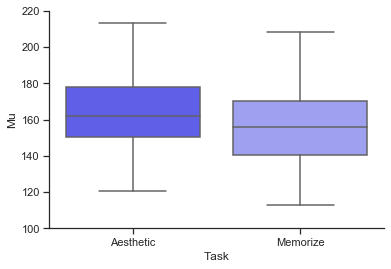

In [46]:
mu_box = sns.boxplot( x = "Task", y = "Mu", data = both_task_df)
mu_box.set(ylim = (100, 220))
sns.despine()
mu_box = mu_box.get_figure()
mu_box.savefig("Mu_Boxplot.png", dpi = 300)

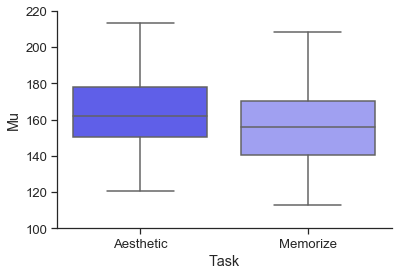

In [86]:
mu_box = sns.boxplot( x = "Task", y = "Mu", data = both_task_df)
mu_box.set(ylim = (100, 220))
sns.despine()
mu_box = mu_box.get_figure()
mu_box.savefig("Mu_Boxplot_Poster.png", dpi = 300)

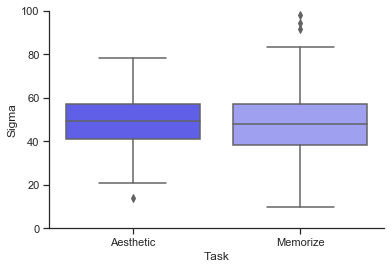

In [41]:
sig_box = sns.boxplot( x = "Task", y = "Sigma", data = both_task_df)
sig_box.set(ylim = (0, 100))
sns.despine()
sig_box = sig_box.get_figure()
sig_box.savefig("Sigma_Boxplot.png", dpi = 300)

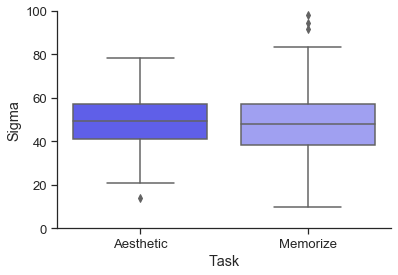

In [87]:
sig_box = sns.boxplot( x = "Task", y = "Sigma", data = both_task_df)
sig_box.set(ylim = (0, 100))
sns.despine()
sig_box = sig_box.get_figure()
sig_box.savefig("Sigma_Boxplot_Poster.png", dpi = 300)

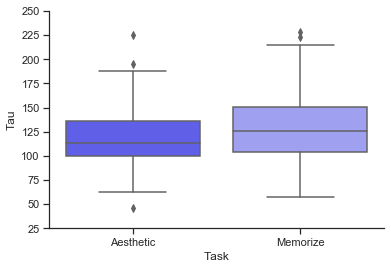

In [43]:
tau_box = sns.boxplot( x = "Task", y = "Tau", data = both_task_df)
tau_box.set(ylim = (25, 250))
sns.despine()
tau_box = tau_box.get_figure()
tau_box.savefig("Tau_Boxplot.png", dpi = 300)

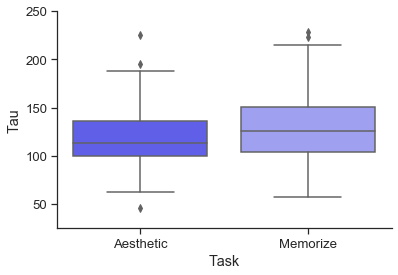

In [88]:
tau_box = sns.boxplot( x = "Task", y = "Tau", data = both_task_df)
tau_box.set(ylim = (25, 250))
sns.despine()
tau_box = tau_box.get_figure()
tau_box.savefig("Tau_Boxplot_Poster.png", dpi = 300)

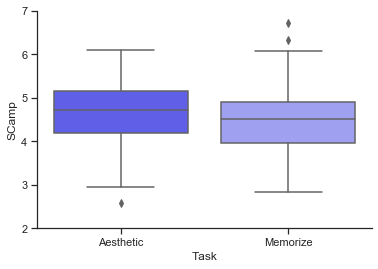

In [45]:
scamp_box = sns.boxplot( x = "Task", y = "SCamp", data = both_task_df)
scamp_box.set(ylim = (2, 7))
sns.despine()
scamp_box = scamp_box.get_figure()
scamp_box.savefig("SCamp_Boxplot.png", dpi = 300)

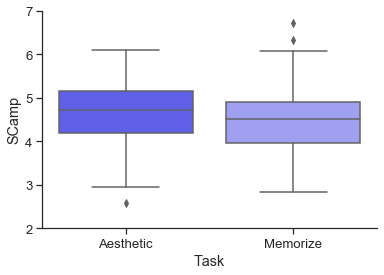

In [89]:
scamp_box = sns.boxplot( x = "Task", y = "SCamp", data = both_task_df)
scamp_box.set(ylim = (2, 7))
sns.despine()
scamp_box = scamp_box.get_figure()
scamp_box.savefig("SCamp_Boxplot_Poster.png", dpi = 300)

## Flipped Axis Scatterplots

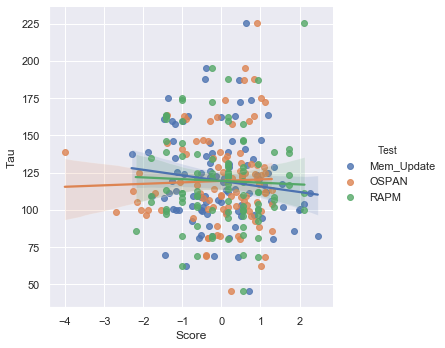

In [4]:
sns.lmplot(x="Score", y="Tau", hue="Test", data= aes_long_df)

## Creating Scatterplots for Working Memory and Ex-Gauss Parameters

### Aesthetic Task

#### OSPAN

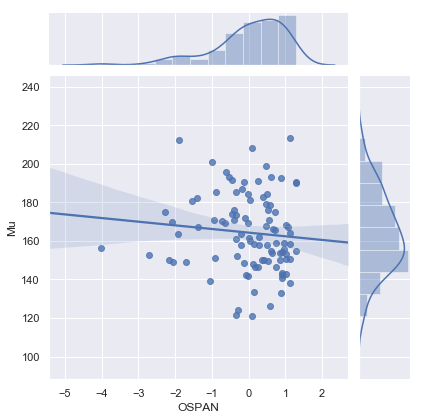

In [25]:
#relationship between OSPAN performance and Mu
sns.jointplot(x="OSPAN", y="Mu", data=aes_qmpe_df, kind = "reg")

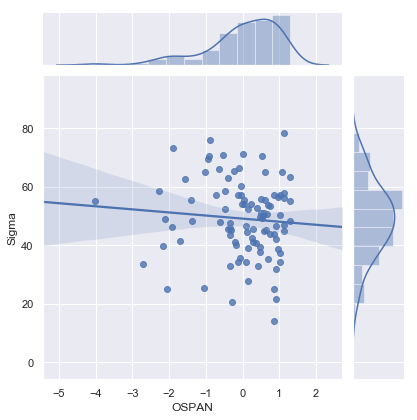

In [26]:
#Relationship between OSPAN performance and Sigma
sns.jointplot(x="OSPAN", y="Sigma", data=aes_qmpe_df, kind = "reg")

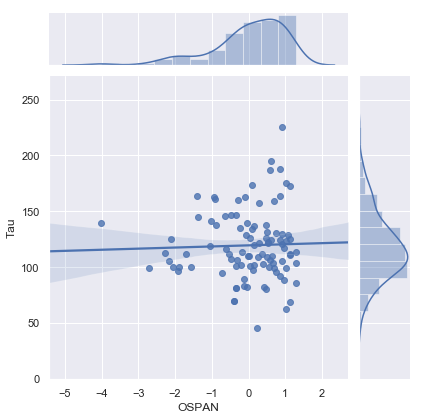

In [27]:
#relationship between OSPAN performance and Tau
sns.jointplot(x="OSPAN", y="Tau", data=aes_qmpe_df, kind = "reg")

## Histograms for Raw Partial Scores

In [3]:
raw_ids = pd.read_csv("ID_Raw_Part.csv", index_col = 0)
raw_ids

,MU_Partial,OSPAN_Partial,RAPM
0,0.489216,0.840,0.750000
1,0.669608,0.963,0.333333
2,0.700000,0.908,0.666667
3,0.584314,0.983,0.416667
4,0.659804,0.972,0.833333
...,...,...,...
93,0.590196,0.946,0.583333
94,0.562745,0.854,0.500000
95,0.678431,0.826,0.583333
96,0.694118,0.810,0.833333


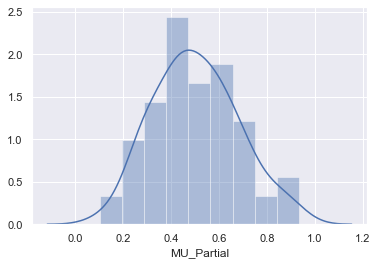

In [4]:
#histogram of the raw partial memory updating scores
mu_part = raw_ids.MU_Partial
sns.distplot(mu_part)

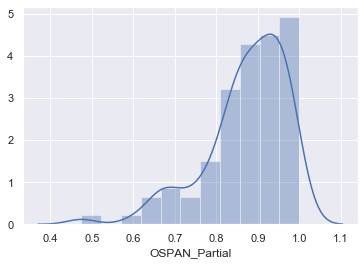

In [5]:
#histogram of the raw partial OSPAN scores
ospan_part = raw_ids.OSPAN_Partial
sns.distplot(ospan_part)

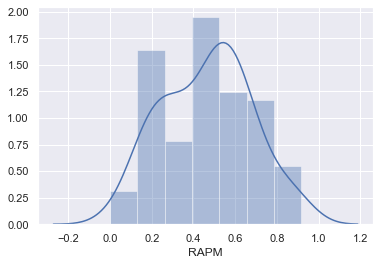

In [6]:
#histogram of the raw partial RAPM scores
rapm_part = raw_ids.RAPM
sns.distplot(rapm_part)